In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import matplotlib as mpl

img_gray = plt.imread(r'D:\py\python\Computer Vision\Image\albert-einstein_gray.jpg');
img_binary = plt.imread(r'D:\py\python\Computer Vision\Image\j.png')

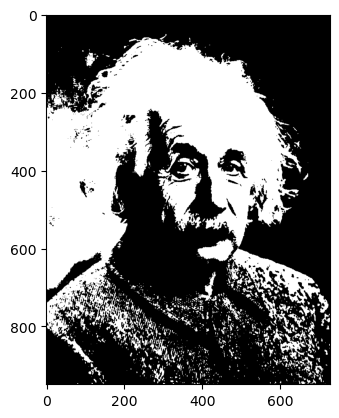

In [2]:
#設定一個閥值 th
th = 100
#它將圖像中所有大於閥值的像素值設為 True，小於等於閥值的像素值設為 False
im2 = img_gray>th
plt.imshow(im2, cmap='gray')

In [3]:
K_r = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

In [4]:
K_r

array([[1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1]], dtype=uint8)

In [5]:
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))

In [6]:
K_e

array([[0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [7]:
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))

In [8]:
K_c

array([[0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 1, 1, 1, 1],
       [0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0]], dtype=uint8)

In [9]:
# 取得一個矩形的 kernel
K_r = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# 取得一個橢圓形的 kernel
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# 取得一個十字形的 kernel
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
# 使用矩形結構元素進行腐蝕運算
E_r = cv2.erode(img_binary, K_r)
# 使用橢圓形結構元素進行腐蝕運算
E_e = cv2.erode(img_binary, K_e)
# 使用十字形結構元素進行腐蝕運算
E_c = cv2.erode(img_binary, K_c)

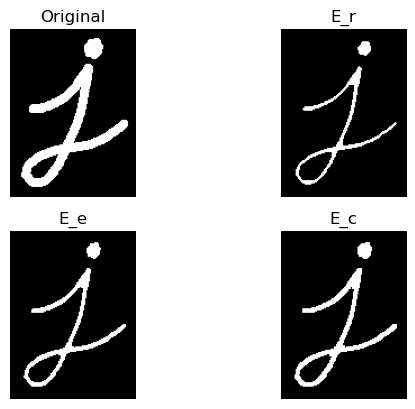

In [10]:
plt.subplot(221)
plt.imshow(img_binary)
plt.title("Original")
plt.axis('off')
plt.subplot(222)
plt.imshow(E_r)
plt.title("E_r")
plt.axis('off')
plt.subplot(223)
plt.imshow(E_e)
plt.title("E_e")
plt.axis('off')
plt.subplot(224)
plt.imshow(E_c)
plt.title("E_c")
plt.axis('off')
plt.show()

In [11]:
# 取得一個矩形的 kernel
K_r = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))
# 取得一個橢圓形的 kernel
K_e = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
# 取得一個十字形的 kernel
K_c = cv2.getStructuringElement(cv2.MORPH_CROSS, (5, 5))
# 使用矩形結構元素進行膨脹運算
D_r = cv2.dilate(img_binary, K_r)
# 使用橢圓形結構元素進行膨脹運算
D_e = cv2.dilate(img_binary, K_e)
# 使用十字形結構元素進行膨脹運算
D_c = cv2.dilate(img_binary, K_c)

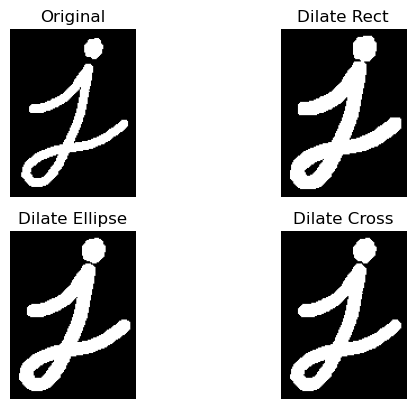

In [12]:
plt.subplot(221)
plt.imshow(img_binary)
plt.title("Original")
plt.axis('off')
plt.subplot(222)
plt.imshow(D_r)
plt.title("Dilate Rect")
plt.axis('off')
plt.subplot(223)
plt.imshow(D_e)
plt.title("Dilate Ellipse")
plt.axis('off')
plt.subplot(224)
plt.imshow(D_c)
plt.title("Dilate Cross")
plt.axis('off')
plt.show()

In [13]:
im_bool = np.array(img_binary[:,:,0],dtype = np.bool)

C:\Users\fish\AppData\Local\Temp\ipykernel_21188\321579918.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  im_bool = np.array(img_binary[:,:,0],dtype = np.bool)


In [14]:
N = np.random.rand(im_bool.shape[0], im_bool.shape[1])

In [15]:
N = np.random.rand(im_bool.shape[0], im_bool.shape[1])
N_binary = N > 0.98


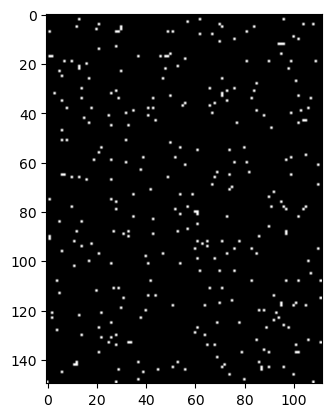

In [16]:
plt.imshow(N_binary, cmap='gray')

In [17]:
img_N = im_bool | N_binary

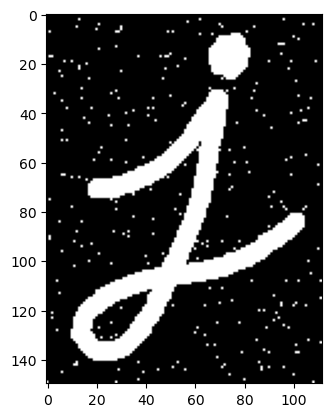

In [18]:
plt.imshow(img_N, cmap='gray')

(-0.5, 111.5, 149.5, -0.5)

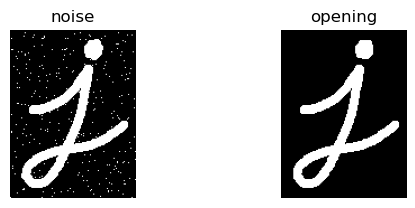

In [33]:
O_r = cv2.morphologyEx(np.float32(img_N), cv2.MORPH_OPEN, K_r)
plt.imshow(O_r, cmap='gray')

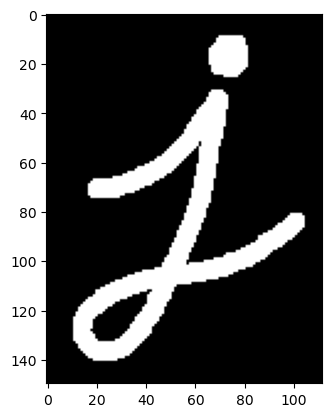

In [20]:
E_r = cv2.erode(np.float32(img_N), K_r)
O_r2 = cv2.dilate(E_r, K_r)
plt.imshow(O_r2, cmap='gray')

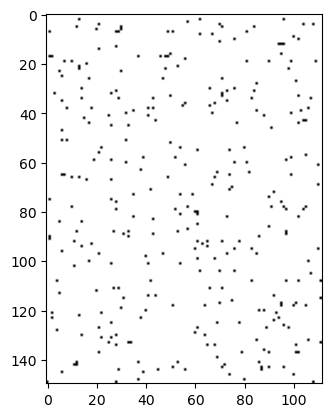

In [21]:
N_binary = N < 0.98
plt.imshow(N_binary, cmap='gray')

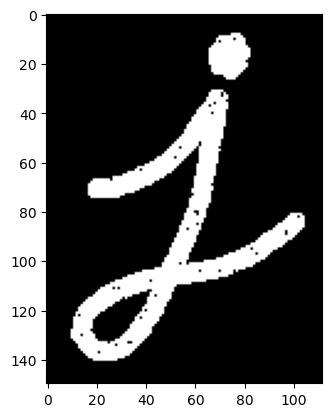

In [22]:
img_H = im_bool & N_binary
plt.imshow(img_H, cmap='gray')

In [23]:
C_r = cv2.morphologyEx(np.float32(img_H), cv2.MORPH_CLOSE, K_r)

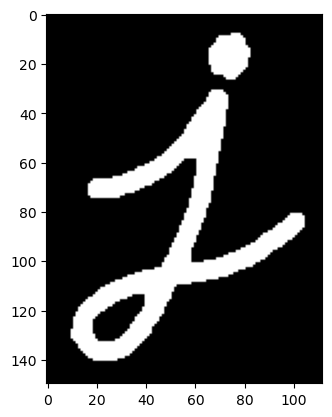

In [24]:
plt.imshow(C_r, cmap='gray')

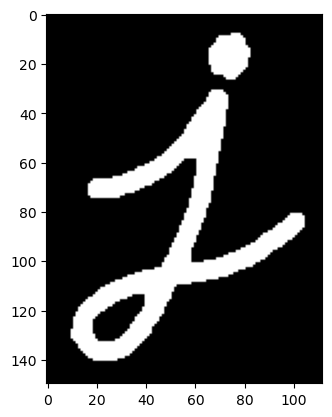

In [25]:
D_r = cv2.dilate(np.float32(img_H), K_r)
C_r2 = cv2.erode(D_r, K_r)
plt.imshow(C_r2, cmap='gray')

In [26]:
G_r = cv2.morphologyEx(C_r, cv2.MORPH_GRADIENT, K_r)

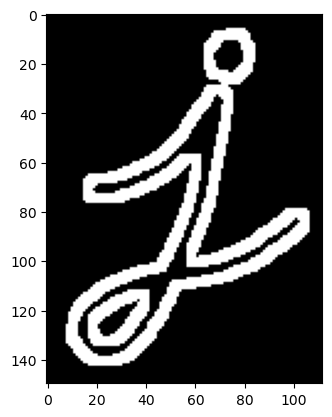

In [27]:
plt.imshow(G_r, cmap='gray')

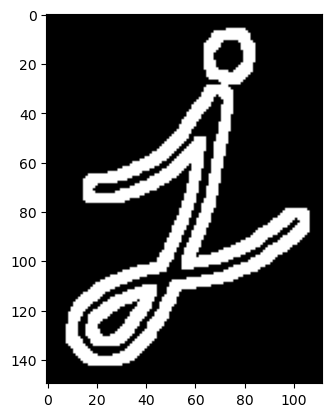

In [28]:
D_r = cv2.dilate(np.float32(im_bool), K_r)
E_r = cv2.erode(np.float32(im_bool), K_r)
G_r2 = D_r - E_r
plt.imshow(G_r2, cmap='gray')

In [29]:
#用 openCV 提供的方法，實現 Top Hat
TH_c = cv2.morphologyEx(E_r, cv2.MORPH_TOPHAT, K_c)

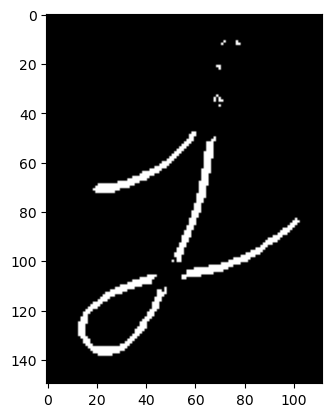

In [30]:
plt.imshow(TH_c, cmap='gray')

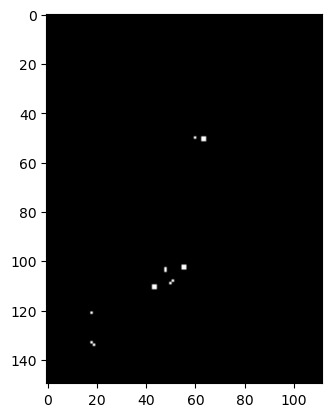

In [31]:
#用 openCV 提供的方法，實現 Black Hat
BH_c = cv2.morphologyEx(E_r, cv2.MORPH_BLACKHAT, K_c)

(-0.5, 111.5, 149.5, -0.5)

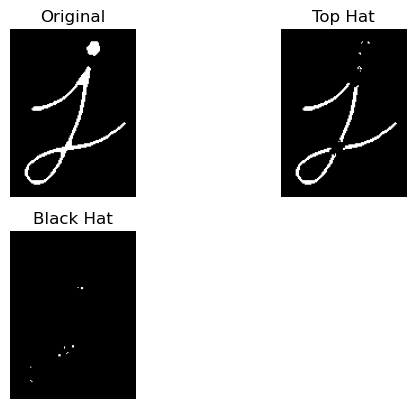

In [32]:
plt.subplot(221)
plt.imshow(E_r, cmap='gray')
plt.title("Original")
plt.axis('off')
plt.subplot(222)
plt.imshow(TH_c, cmap='gray')
plt.title("Top Hat")
plt.axis('off')
plt.subplot(223)
plt.imshow(BH_c, cmap='gray')
plt.title("Black Hat")
plt.axis('off')


In [ ]:
#用 openCV 提供的方法，實現 Gradient Morphology
G_r = cv2.morphologyEx(C_r, cv2.MORPH_GRADIENT, K_r)

#使用 Erosion 跟 dilation 實現 Gradient Morphology
D_r = cv2.dilate(np.float32(im_bool), K_r)
E_r = cv2.erode(np.float32(im_bool), K_r)
G_r2 = D_r - E_r